In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import integrate, arange

In [2]:
def f_a(x,t):
    return -x

In [3]:
def f_b(x,t): 
    return 1.0/x

In [4]:
def f_d(x,t):
    return x*(1.0-x)
    #A = np.arange([[-1,0][1,1]])
    #return A @ x

In [5]:
def euler_student(f_func,x_0,t, dt=0.01 ):
    # 'f_func' should be a callable f(x,t)
    # 'x_0' initial condition x(t_0)
    # 't' A sequence of time points for which to solve y. 
    # the initial value point should be the first element of this sequence
    
    X = np.zeros(t.shape)
    X[0] = x_0
    for ti in np.arange(1,X.size):
        X[ti] = X[ti-1] + f_func(X[ti-1],ti) * dt
    return X

In [7]:
ts_a = np.linspace(-4,4,50)

xs_a = euler_student(f_a,1.,ts_a)

In [11]:
def euler_c (f_func,x_0,t):
    X = np.zeros((len(t),len(x_0)))
    X[0,:] = x_0
    np.diff(t)
    
    for i,time in enumerate(t[1:]):
        X[i+1,:] = X[i,:] + f_func(X[i,:],t[i]) * dt[i]
        

In [12]:
#euler method as a function of the function f(x,t), initial condition x_0
def euler_easy (f_func,x_0,t_max,dt):
    x = x_0
    
    for t in np.arange(0,t_max,dt):
        
        x = x + f_func(x,t)*dt
        
    return x

In [17]:
ts_d = np.linspace(-4,4,50)
xs_d_an = np.exp(ts_d) / (1+np.exp(ts_d)) #analytical values
xs_d_rk = integrate.odeint(f_a ,np.array([0.5]), ts_d)[:,0] #values of 

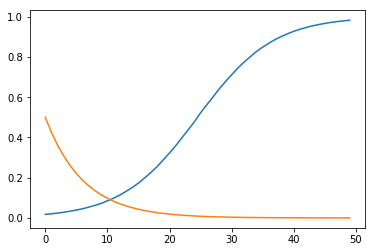

In [18]:
ts_d = np.linspace(-4,4,50)
xs_d = [euler_easy(f_d,0.5,t,np.sign(t)*0.01) for t in ts_d]

plt.plot(xs_d)
plt.plot(xs_d_rk)

In [5]:
def dominance_durations(x1,x2,t):
    buf = np.zeros(t.shape)
    buf = x1 > x2
    durations = []
    
    start = t[0]
    end = t[0]
    for i in range(1,t.shape[0]): 
        if buf[i] == buf[i-1]:    #that means we have dominance continuing
            end = t[i]
        
        else:
            end = t[i]
            #print(end)
            durations.append(end-start)
            start = t[i]
            

    return durations

In [6]:

x1 = np.random.rand(10)
x2 = np.random.rand(10)
t = np.arange(10)

dominance_durations(x1,x2,t)

[2, 7]